# Ajuste a unos datos con forma de Sigmoide
---
## Importamos los datos y los representamos

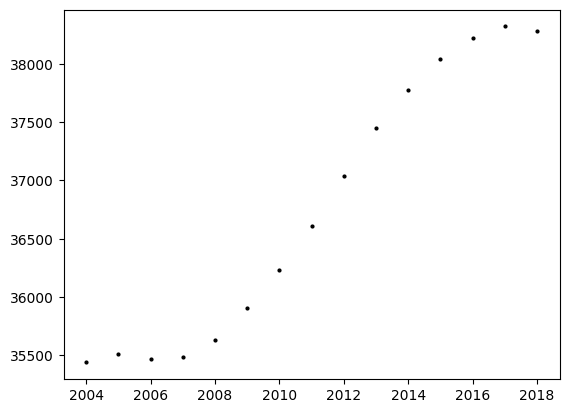

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statistics

t, N = np.loadtxt('datos-sigmoide.dat', usecols=(0,1), unpack=True)
plt.plot(t,N, 'ok', markersize=2)

---
## Hacemos que t empiece en 0 y trasladamos la gráfica cerca del eje $\overline{OX}$

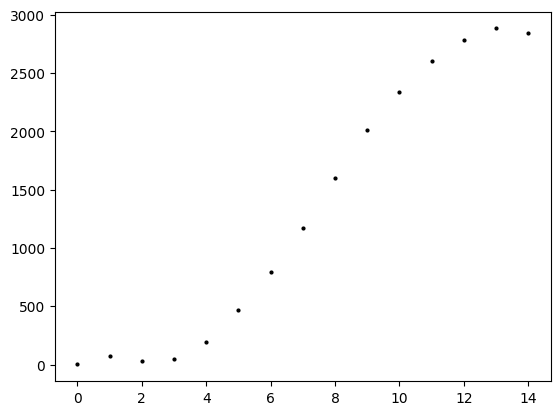

In [2]:
t=t-t.min() #Hacemos que t empiece en 0
Nmin = min(N)
N=N-min(N)+1 #Acercamos los datos al eje OX
plt.plot(t,N, 'ok', markersize=2) #Graficamos los datos modificados y observamos que siguen manteniendo la forma de sigmoide, 
plt.show()                        #esto tiene sentido pues solo les hemos aplicado una traslación

---
## Realizamos el ajusta para distintos valores de $K$

In [3]:
N0=N[0]
K_list = np.linspace(max(N)+1, max(N)+min(N), 10**5) #Escogemos los K para que no estén muy lejos de el valor                                                     
N2 = np.zeros(len(N))                                #máximo de N (10^5 valores distintos de K)
r_list = []
t=t.reshape((-1,1))
for K in K_list:
    for i in range(len(N)):
        N2[i]=np.log(N[i]/(K-N[i])) #Escala logarítmica para que los datos sean aproximadamente una recta
    model = LinearRegression().fit(t, N2) #Realizamos la regresión lineal (por mínimos cuadrados)
    r_list.append(model.score(t, N2)) #Guardamos el valor de R^2

---
## Averiguamos para que valor de $K$ obtenemos la mejor regresión lineal y la representamos

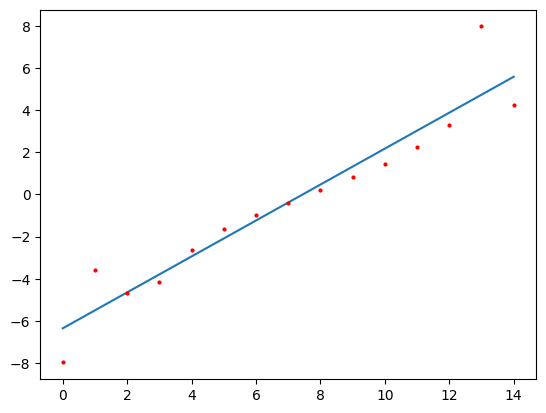

K = 2883.7999999999956
R^2 = 0.9070615391427045
r = 0.8519671616484835


In [4]:
K=K_list[np.argmax(r_list)] #Escogemos el K que nos devuelve el mayor R^2
for i in range(len(N)):
        N2[i]=np.log(N[i]/(K-N[i])) #Escala logarítmica
model = LinearRegression().fit(t, N2) #Realizamos el ajuste para el mejor K
r=model.coef_[0] #Obtenemos el valor correspondiente a r
t_part = np.linspace(t.min(),t.max(), 10**6)
C=model.intercept_
recta=[]
for i in t_part:
     recta.append(C+i*r)
plt.plot(t_part,recta)  #Graficamos los datos en escala logarítmica con la recta que los aproxima
plt.plot(t,N2, 'or', markersize=2)
plt.show()
print('K =', K)
print('R^2 =', max(r_list))
print('r =', r)

---
## Representamos la aproximación a la sigmoide con los parámetros obtenidos

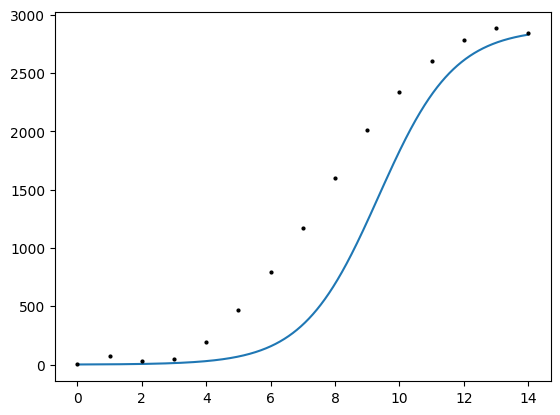

In [5]:
sigmoide = np.zeros(len(t_part)) 
for i in range(len(t_part)):
    sigmoide[i]=(K*N0)/(N0+(K-N0)*np.exp(-r*t_part[i]))
plt.plot(t_part, sigmoide)
plt.plot(t,N, 'ok', markersize=2)
plt.show()

---
## Deshacemos el cambio inicial (la traslación) y guardamos el gráfico

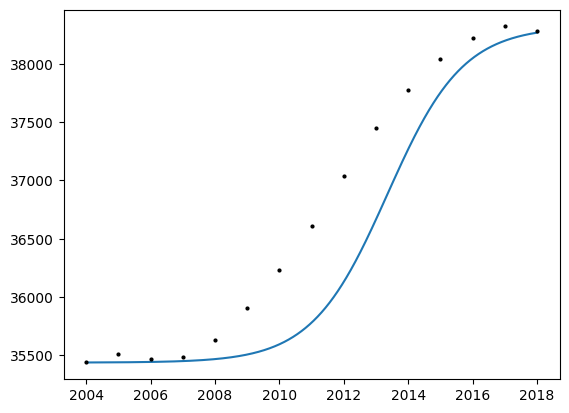

In [6]:
N = N+Nmin-1
sigmoide = sigmoide+Nmin-1
t = np.loadtxt('datos-sigmoide.dat', usecols=(0), unpack=True)
t_part = np.linspace(t.min(),t.max(), 10**6)
plt.plot(t_part, sigmoide)
plt.plot(t,N, 'ok', markersize=2)
plt.savefig('sig_aprox.png')
plt.show()